In [6]:
import pandas as pd
df=pd.read_csv("C:\\Users\\sreer\\Desktop\\MLJOURNEY\\pandas_works\\customer_behaviour_casestudy\\E-commerce Customer Behavior - Sheet1.csv")
df.head(3)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied


In [2]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='str')

In [13]:
df.isnull().sum()

customer_id                 0
gender                      0
age                         0
city                        0
membership_id               0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          2
dtype: int64

In [12]:
df.rename(columns={"Customer ID":"customer_id","Gender":"gender","Age":"age","City":"city","Membership Type":"membership_id","Total Spend":"total_spend","Items Purchased":"items_purchased","Average Rating":"average_rating","Discount Applied":"discount_applied","Days Since Last Purchase":"days_since_last_purchase","Satisfaction Level":"satisfaction_level"},inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'membership_id', 'total_spend',
       'items_purchased', 'average_rating', 'discount_applied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='str')

In [17]:
df["satisfaction_level"]=df["average_rating"].apply(lambda x:"unsatisfied" if x<=4.0 else "neutral" )

In [4]:
#genderwise count
df["gender"].value_counts()

gender
Female    175
Male      175
Name: count, dtype: int64

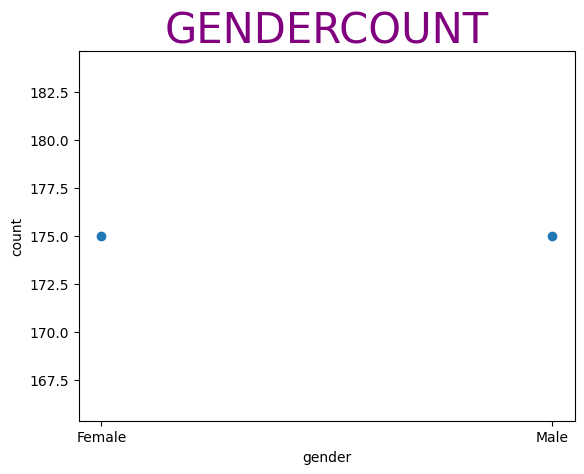

In [8]:
gender_count=df["gender"].value_counts()
import matplotlib.pyplot as plt
plt.plot(gender_count.index,gender_count.values,marker="o",linestyle="none")
plt.title("GENDERCOUNT",color="purple",size=30)
plt.xlabel("gender")
plt.ylabel("count")
plt.show()

In [9]:
#customer avg age
df["age"].mean().astype("int")

np.int64(33)

In [14]:
#unique membership
df["membership_id"].unique()


array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [16]:
#membershipwise count
df["membership_id"].value_counts()

membership_id
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64

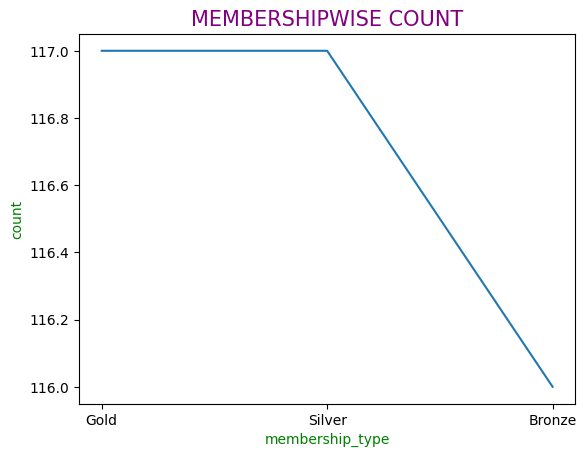

In [25]:
membership=df["membership_id"].value_counts()
import matplotlib.pyplot as plt
plt.plot(membership)
plt.title("MEMBERSHIPWISE COUNT",color="purple",size=15)
plt.xlabel("membership_type",color="green")
plt.ylabel("count",color="green")
plt.show()

In [26]:
#membershipwise total spend
df.groupby("membership_id")["total_spend"].sum()

membership_id
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: total_spend, dtype: float64

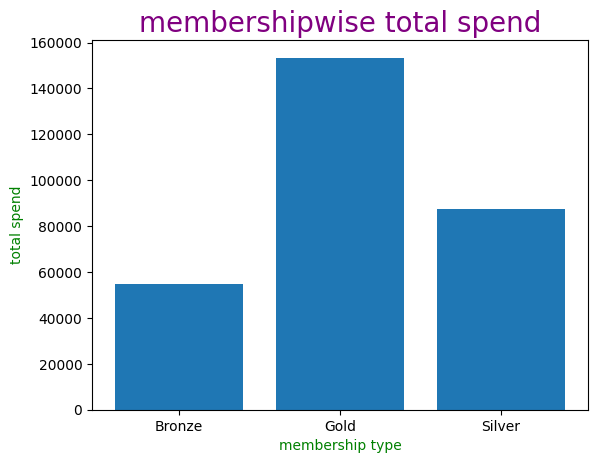

In [29]:
total_spend=df.groupby("membership_id")["total_spend"].sum()
import matplotlib.pyplot as plt
plt.bar(total_spend.index,total_spend.values)
plt.title("membershipwise total spend",color="purple",size=20)
plt.xlabel("membership type",color="green")
plt.ylabel("total spend",color="green")
plt.show()

In [32]:
#gold members details
df[df["membership_id"]=="Gold"]

,customer_id,gender,age,city,membership_id,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,Satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,Satisfied


In [35]:
#rating above 4.5
df[df["average_rating"]>4.5]

,customer_id,gender,age,city,membership_id,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
15,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,Satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
326,427,Male,30,San Francisco,Gold,1450.5,19,4.6,False,14,Satisfied
332,433,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,Satisfied
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied


In [36]:
#customers per city
df["city"].value_counts()

city
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

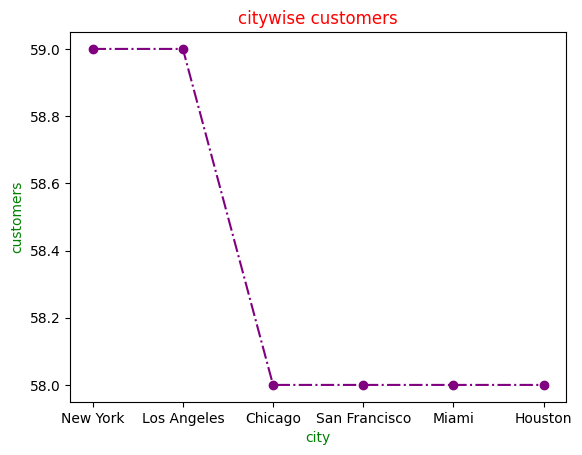

In [39]:
city=df["city"].value_counts()
import matplotlib.pyplot as plt
plt.plot(city.index,city.values,marker="o",linestyle="dashdot",color="purple")
plt.title("citywise customers",color="red")
plt.xlabel("city",color="green")
plt.ylabel("customers",color="green")
plt.show()

In [40]:
#citywise total spend
df.groupby("city")["total_spend"].sum()

city
Chicago          28993.2
Houston          25919.9
Los Angeles      47524.0
Miami            40042.6
New York         68737.1
San Francisco    84666.8
Name: total_spend, dtype: float64

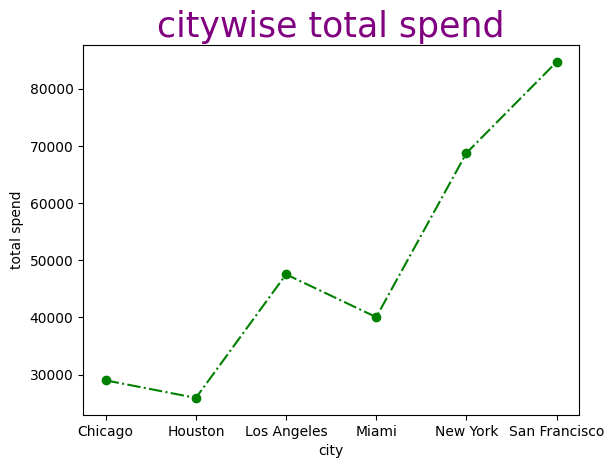

In [43]:
citywise_total=df.groupby("city")["total_spend"].sum()
import matplotlib.pyplot as plt
plt.plot(citywise_total.index,citywise_total.values,marker="o",color="green",linestyle="dashdot")
plt.title("citywise total spend",color="purple",size=25)
plt.xlabel("city")
plt.ylabel("total spend")
plt.show()

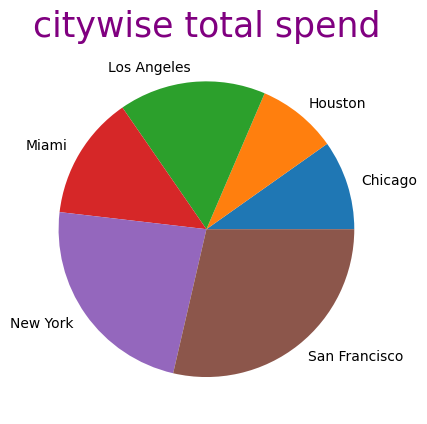

In [44]:
citywise_total=df.groupby("city")["total_spend"].sum()
import matplotlib.pyplot as plt
plt.pie(citywise_total.values,labels=citywise_total.index)
plt.title("citywise total spend",color="purple",size=25)
plt.show()

In [45]:
#citywise avg rating
df.groupby("city")["average_rating"].mean()

city
Chicago          3.456897
Houston          3.193103
Los Angeles      4.172881
Miami            3.927586
New York         4.544068
San Francisco    4.808621
Name: average_rating, dtype: float64

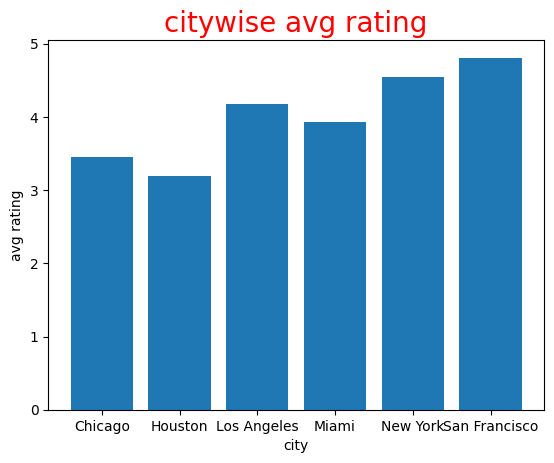

In [46]:
avg_rating=df.groupby("city")["average_rating"].mean()
import matplotlib.pyplot as plt
plt.bar(avg_rating.index,avg_rating.values)
plt.title("citywise avg rating",color="red",size=20)
plt.xlabel("city")
plt.ylabel("avg rating")
plt.show()

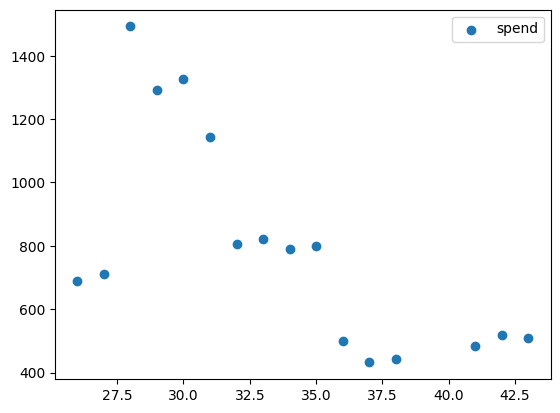

In [13]:
#agewise total spend
import matplotlib.pyplot as plt
age_total_spend=df.groupby("age")["total_spend"].mean()
age_total_spend
plt.scatter(age_total_spend.index,age_total_spend.values,label="spend")
plt.legend()


(array([ 69., 106.,  84.,  33.,  58.]),
 array([26. , 29.4, 32.8, 36.2, 39.6, 43. ]),
 <BarContainer object of 5 artists>)

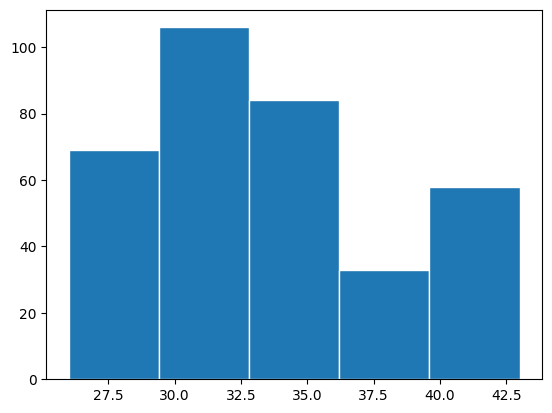

In [14]:
plt.hist(df["age"],bins=5,edgecolor="white")